<a href="https://colab.research.google.com/github/Himanshu-sharmaonline/Hands-On-work/blob/main/kaggle/X_ray_abnormalities_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#kaggle competitions download -c vinbigdata-chest-xray-abnormalities-detection
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"himanshukumarsharma","key":"fa5ee604878d59cd89053ba9b5d7643e"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
! kaggle competitions download -c vinbigdata-chest-xray-abnormalities-detection

 57% 5.00M/8.79M [00:00<00:00, 47.2MB/s]
100% 8.79M/8.79M [00:00<00:00, 55.2MB/s]
  0% 0.00/9.31M [00:00<?, ?B/s]
100% 9.31M/9.31M [00:00<00:00, 85.5MB/s]
 99% 9.00M/9.08M [00:00<00:00, 28.7MB/s]
100% 9.08M/9.08M [00:00<00:00, 26.0MB/s]
  0% 0.00/9.64M [00:00<?, ?B/s]
100% 9.64M/9.64M [00:00<00:00, 88.1MB/s]
  0% 0.00/4.63M [00:00<?, ?B/s]
100% 4.63M/4.63M [00:00<00:00, 76.2MB/s]
  0% 0.00/4.98M [00:00<?, ?B/s]
100% 4.98M/4.98M [00:00<00:00, 81.7MB/s]
 52% 5.00M/9.58M [00:00<00:00, 48.6MB/s]
100% 9.58M/9.58M [00:00<00:00, 61.0MB/s]
100% 8.89M/8.89M [00:00<00:00, 72.4MB/s]

  0% 0.00/8.11M [00:00<?, ?B/s]
100% 8.11M/8.11M [00:00<00:00, 74.6MB/s]
  0% 0.00/6.48M [00:00<?, ?B/s]
100% 6.48M/6.48M [00:00<00:00, 104MB/s]
 72% 7.00M/9.74M [00:00<00:00, 72.2MB/s]
100% 9.74M/9.74M [00:00<00:00, 62.1MB/s]
  0% 0.00/6.30M [00:00<?, ?B/s]
100% 6.30M/6.30M [00:00<00:00, 103MB/s]
 92% 8.00M/8.71M [00:00<00:00, 83.7MB/s]
100% 8.71M/8.71M [00:00<00:00, 79.9MB/s]
 79% 5.00M/6.33M [00:00<00:00, 42.0MB/s

In [6]:
!pip install -q pydicom

     |████████████████████████████████| 1.9MB 4.4MB/s 


In [7]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob
from zipfile import ZipFile
import pydicom as dicom

In [8]:
train=pd.read_csv(r'/content/train.csv.zip')

In [9]:
train.head()

image_id          class_name  ...   x_max   y_max
0  50a418190bc3fb1ef1633bf9678929b3          No finding  ...     NaN     NaN
1  21a10246a5ec7af151081d0cd6d65dc9          No finding  ...     NaN     NaN
2  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly  ...  1653.0  1831.0
3  051132a778e61a86eb147c7c6f564dfe  Aortic enlargement  ...  1611.0  1019.0
4  063319de25ce7edb9b1c6b8881290140          No finding  ...     NaN     NaN

[5 rows x 8 columns]

In [10]:
train["image_id"][1]

'21a10246a5ec7af151081d0cd6d65dc9'

In [11]:
glob.glob("/content/*.zip")

['/content/0046f681f078851293c4e710c4466058.dicom.zip',
 '/content/00575e3846ebd05a909d97ba59c53d30.dicom.zip',
 '/content/0021df30f3fddef551eb3df4354b1d06.dicom.zip',
 '/content/00a2145de1886cb9eb88869c85d74080.dicom.zip',
 '/content/00b7e6bfa4dc1fe9ddd0ce74743e38c2.dicom.zip',
 '/content/011295e0bcdc7636569ab73bfdcc4450.dicom.zip',
 '/content/02425334e92510da663eb913ad0632ea.dicom.zip',
 '/content/016bc723c3ceedb78e27ebfe7032498e.dicom.zip',
 '/content/0168eb925aa6f28a78b16134792f5d0e.dicom.zip',
 '/content/004f33259ee4aef671c2b95d54e4be68.dicom.zip',
 '/content/004d2bc2111d639f5e8441ced52d55cb.dicom.zip',
 '/content/train.csv.zip',
 '/content/019df578e38053e614d483f7fb347b26.dicom.zip',
 '/content/0059d21bef1793fa9522e4ec8cae1a1a.dicom.zip',
 '/content/0006e0a85696f6bb578e84fafa9a5607.dicom.zip',
 '/content/00053190460d56c53cc3e57321387478.dicom.zip',
 '/content/000ae00eb3942d27e0b97903dd563a6e.dicom.zip',
 '/content/002a34c58c5b758217ed1f584ccbcfe9.dicom.zip',
 '/content/0015034328

In [12]:
for i in glob.glob("/content/*dicom.zip"):
  if i.endswith(".zip"):
    with ZipFile(i, 'r') as zipObj:
   # Extract all the contents of zip file in different directory
      zipObj.extractall('unzip')

In [13]:
unzip_files=[]
for i in glob.glob("/content/unzip/*.dicom"):
  unzip_files.append(i)

In [14]:
unzip_files[0]

'/content/unzip/011295e0bcdc7636569ab73bfdcc4450.dicom'

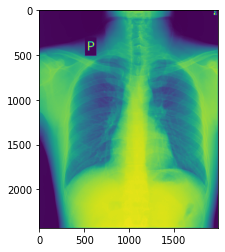

In [15]:
image_path = unzip_files[0]
ds = dicom.dcmread(image_path)
plt.imshow(ds.pixel_array)

/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:177: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({ds.BitsStored}-bit) "


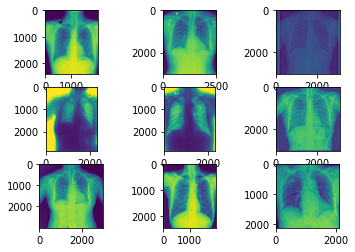

In [16]:
for i in range(9):
  ds = dicom.dcmread(unzip_files[i])
  plt.subplot(330 + 1 + i)
  plt.imshow(ds.pixel_array)
	# plt.imshow(training_features[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
filter=[i.rsplit("/",1)[1][:-6] for i in unzip_files if i.rsplit("/",1)[1][:-6] in train["image_id"].tolist()]

In [ ]:
filter

['0005e8e3701dfb1dd93d53e2ff537b6e',
 '003cfe5ce5c0ec5163138eb3b740e328',
 '00053190460d56c53cc3e57321387478',
 '0006e0a85696f6bb578e84fafa9a5607',
 '004d2bc2111d639f5e8441ced52d55cb',
 '0046f681f078851293c4e710c4466058',
 '001d127bad87592efe45a5c7678f8b8d',
 '004dc2a50591fb5f1aaf012bffa95fd9',
 '000434271f63a053c4128a0ba6352c7f',
 '0032c6091dc8f1b1245fc2f5f45458fa',
 '0021df30f3fddef551eb3df4354b1d06',
 '00575e3846ebd05a909d97ba59c53d30',
 '005be26a68485912e007a3703f43d60a',
 '000ae00eb3942d27e0b97903dd563a6e',
 '0007d316f756b3fa0baea2ff514ce945',
 '00176f7e1b1cb835123f95960b9a9efd',
 '00291f7aff0123ea76a59998effef229',
 '0059d21bef1793fa9522e4ec8cae1a1a',
 '00150343289f317a0ad5629d5b7d9ef9',
 '000d68e42b71d3eac10ccc077aba07c1']

In [ ]:
ploting=train[train["image_id"]==filter[0]]

In [ ]:
ploting

image_id     class_name  ...   x_max  y_max
664    0005e8e3701dfb1dd93d53e2ff537b6e   Lung Opacity  ...  1205.0  888.0
13648  0005e8e3701dfb1dd93d53e2ff537b6e    Nodule/Mass  ...  1197.0  896.0
15180  0005e8e3701dfb1dd93d53e2ff537b6e   Infiltration  ...  1205.0  888.0
16938  0005e8e3701dfb1dd93d53e2ff537b6e   Lung Opacity  ...  1203.0  890.0
48751  0005e8e3701dfb1dd93d53e2ff537b6e  Consolidation  ...  1197.0  896.0

[5 rows x 8 columns]

In [ ]:
def image(name):
  image_path = "/content/unzip/"+ name+".dicom"
  ploting=train[train["image_id"]==name]
  ds = dicom.dcmread(image_path)
  fig, ax = plt.subplots(figsize=(20, 10))
  ax.imshow(ds.pixel_array)
  # plt.imshow(ds.pixel_array)
  for i in ploting.index:
    x=ploting["x_min"][i]
    y=ploting["y_min"][i]
    hor=ploting["x_max"][i]-ploting["x_min"][i]
    ver=ploting["y_max"][i]-ploting["y_min"][i]
    rect = patches.Rectangle((x, y), hor,ver, linewidth=1, edgecolor='r', facecolor='none',label=ploting["class_name"][i])
    ax.add_patch(rect)
  # rect = patches.Rectangle((900.0, 587.0), 1205.0-900.0, 888.0-587.0, linewidth=1, edgecolor='r', facecolor='none',)
  # ax.add_patch(rect)
  # Add the patch to the Axes
  # plt.subplot.add_patch(rect)
  plt.legend()
  # plt.show()
  return plt.show()

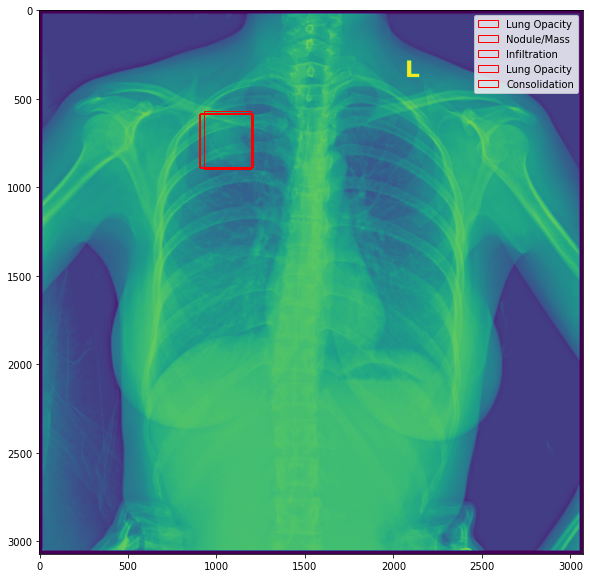

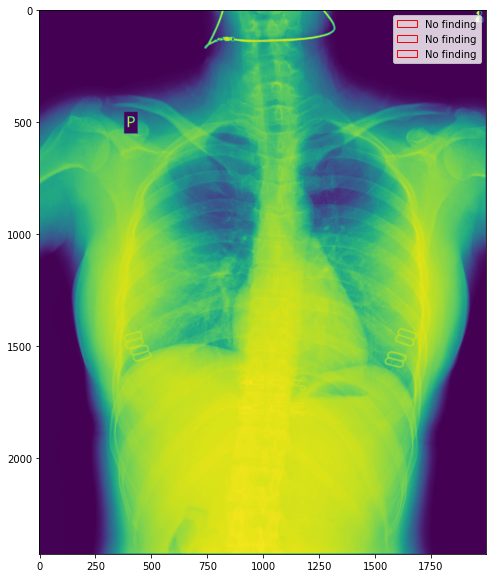

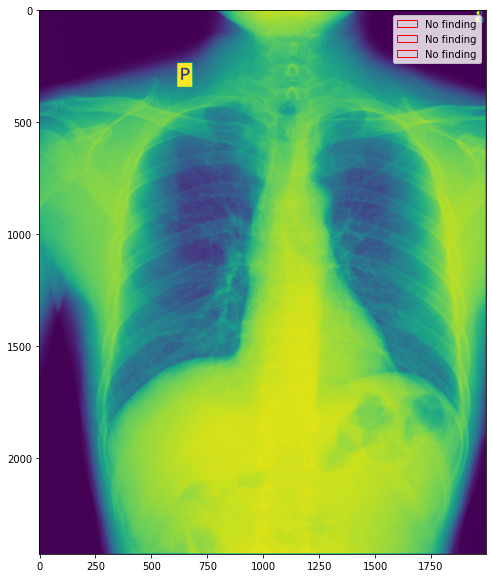

/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:177: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({ds.BitsStored}-bit) "


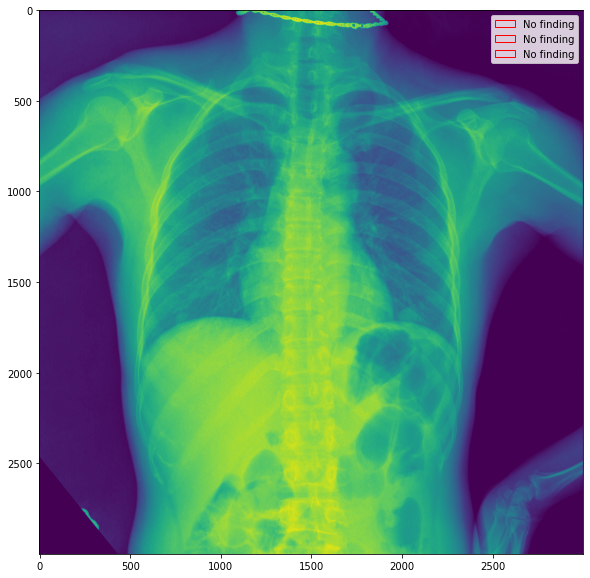

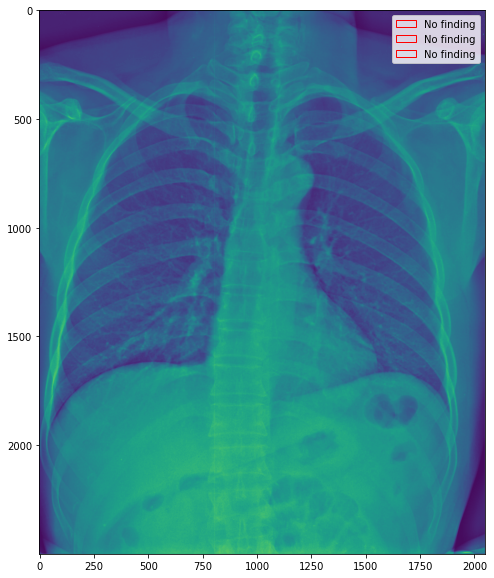

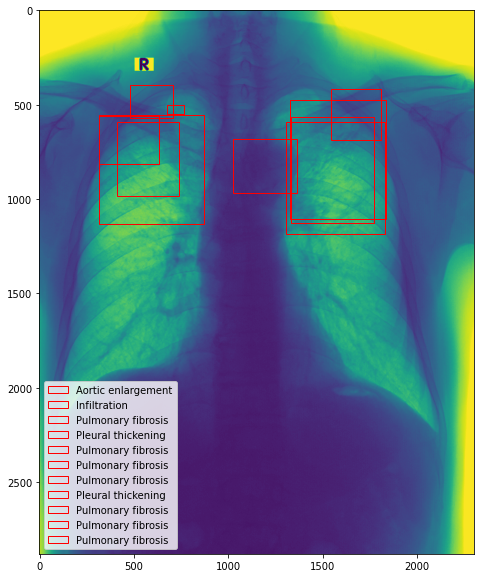

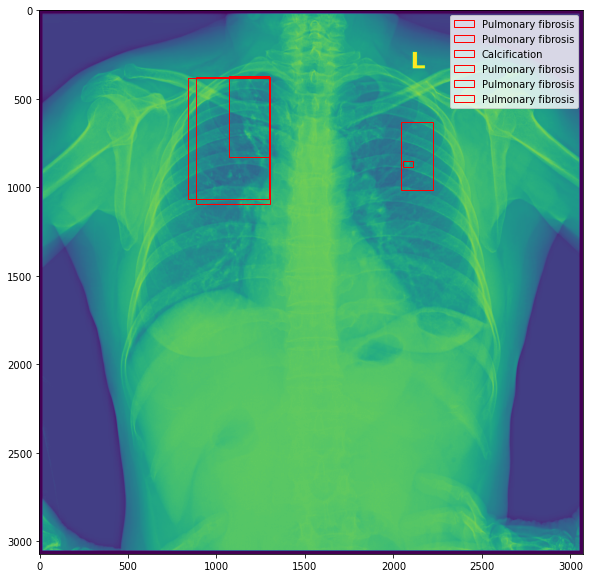

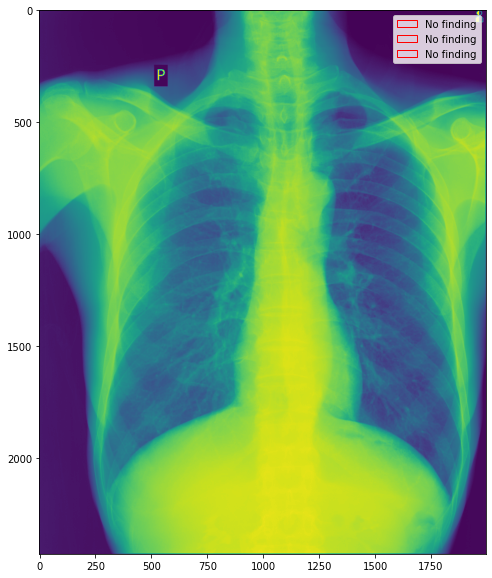

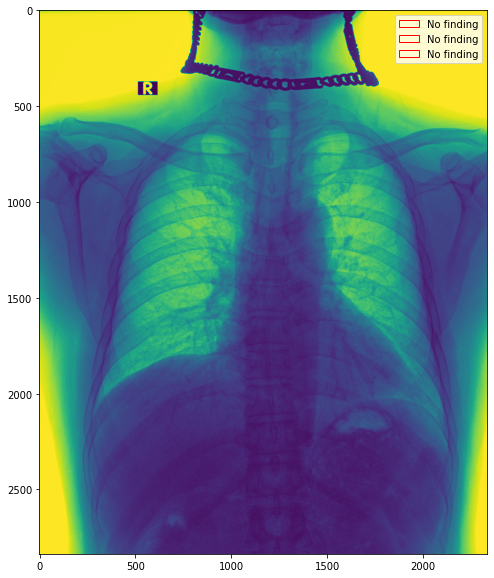

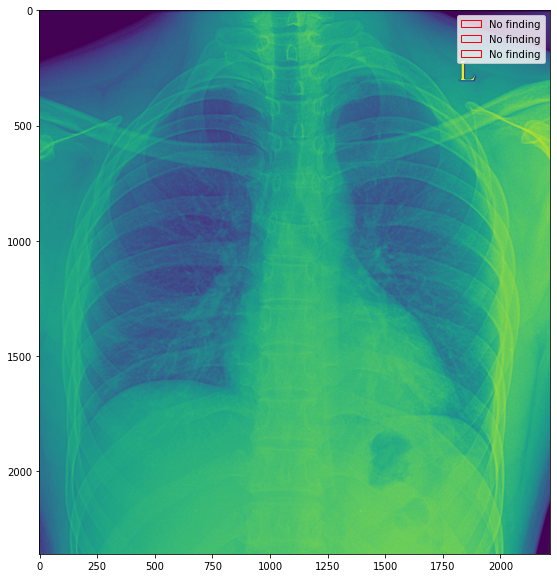

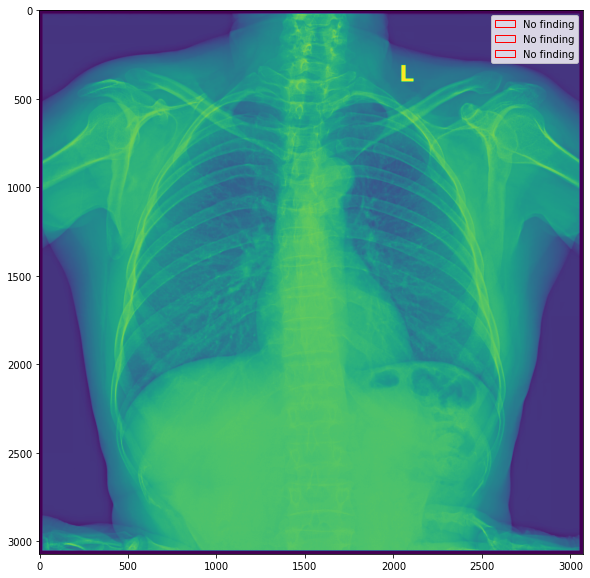

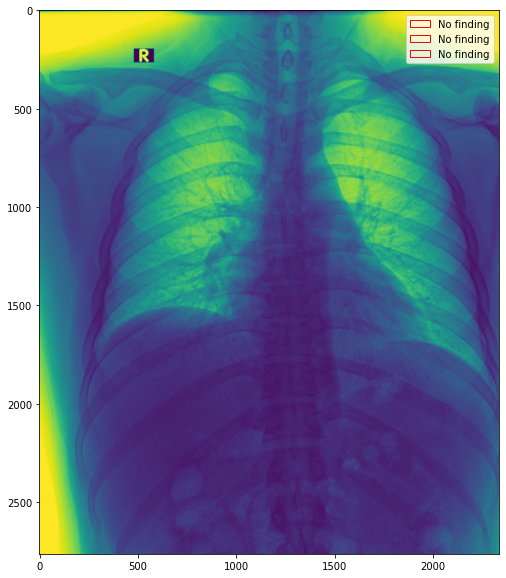

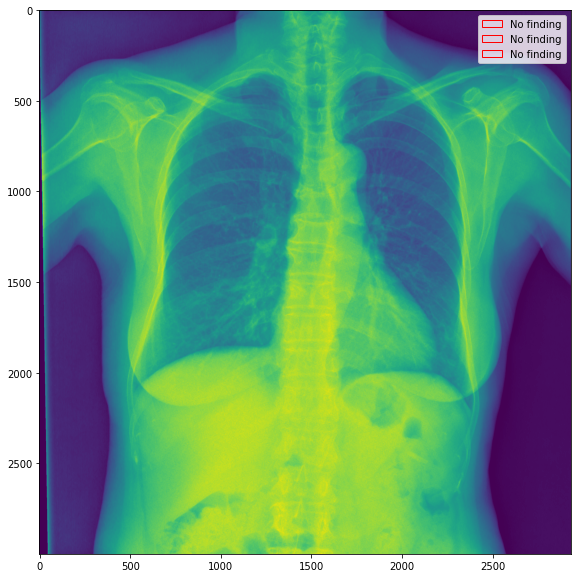

In [ ]:
for i in range(13):
  # plt.imshow(ds.pixel_array)
	# plt.imshow(training_features[i], cmap=plt.get_cmap('gray'))
  image(filter[i])

In [ ]:
!pip install -q pdf2image

In [ ]:
from pdf2image import convert_from_path
images = convert_from_path('/content/trial_subset.pdf')
 
for i in range(len(images)):
    images[i].save('page'+ str(i) +'.jpg', 'JPEG')

PDFInfoNotInstalledError: ignored

In [ ]:
from wand.image import Image

ImportError: ignored

In [ ]:
!pip install wand

     |████████████████████████████████| 143kB 4.4MB/s 
